DATA 1030 Project 1: Population Growth Rate Prediction

Questions to think about:
    1. Use income/person (GDP/capita, PPP$ inflation_adjusted) 
        or GDP/capita (inflation_adjusted) 
        or GDP/capita growth rate  ???
    2. Need better data for education factors, policy, war, migration, death rate.....
    3. Dan suggested "population growth rate = birth rate - death rate".   
    4. ...

Step 0: Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# plt.style.use('seaborn-whitegrid')

Step 0.1: Read Play_sample_data

In [2]:
#play = pd.read_csv('/Users/chuwu/Desktop/project1/play_sample_data.csv')

Step 1: Read Data

In [3]:
growth_rate = pd.read_csv('/Users/RHedg/Desktop/project1/datasets/population_growth_annual_percent.csv')
mortality = pd.read_csv('/Users/RHedg/Desktop/project1/datasets/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
food = pd.read_csv('/Users/RHedg/Desktop/project1/datasets/food_supply_kilocalories_per_person_and_day.csv')
income = pd.read_csv('/Users/RHedg/Desktop/project1/datasets/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
gdp = pd.read_csv('/Users/RHedg/Desktop/project1/datasets/gdppercapita_us_inflation_adjusted.csv')
hdi = pd.read_csv('/Users/RHedg/Desktop/project1/datasets/hdi_human_development_index.csv')
unemployment = pd.read_csv('/Users/RHedg/Desktop/project1/datasets/long_term_unemployment_rate_percent.csv')
policy = pd.read_csv('/Users/RHedg/Desktop/project1/datasets/population_policies_aid_given_percent_of_aid.csv')
             

In [4]:
#we'd better find other datasets to construct education factors??????????
# male_25_edu_year = pd.read_csv('/Users/chuwu/Desktop/project1/datasets/mean_years_in_school_men_25_years_and_older.csv')
# female_percent_15_19 = pd.read_csv('/Users/chuwu/Desktop/project1/datasets/population_aged_15_19_years_female_percent.csv')


In [5]:
# A cell left for you to print datasets above 



In [14]:
#see how many countries and how many years are in the dataset
#find the starting year and the end year of each dataset
print("growth_rate:" , growth_rate.shape, ",  from " , growth_rate.columns.values[1], " to ", growth_rate.columns.values[-1] )
print("mortality:" , mortality.shape, ",  from " , mortality.columns.values[1], " to ", mortality.columns.values[-1]) 
print("food:" , food.shape, ",  from " , food.columns.values[1], " to ", food.columns.values[-1])
print("income:" , income.shape , ",  from " , income.columns.values[1], " to ", income.columns.values[-1])
print("gdp:" , gdp.shape , ",  from " , gdp.columns.values[1], " to ", gdp.columns.values[-1])
print("hdi:" , hdi.shape, ",  from " , hdi.columns.values[1], " to ", hdi.columns.values[-1])
print("unemployment:" , unemployment.shape, ",  from " , unemployment.columns.values[1], " to ", unemployment.columns.values[-1])
print("policy:" , policy.shape, ",  from " , policy.columns.values[1], " to ", policy.columns.values[-1])


growth_rate: (194, 59) ,  from  1960  to  2017
mortality: (193, 220) ,  from  1800  to  2018
food: (168, 54) ,  from  1961  to  2013
income: (193, 220) ,  from  1800  to  2018
gdp: (190, 59) ,  from  1960  to  2017
hdi: (187, 27) ,  from  1990  to  2015
unemployment: (121, 29) ,  from  1990  to  2017
policy: (22, 25) ,  from  1984  to  2007


In [15]:
#count the number of missing values for each year of each datasets
#help to determine using which years' data
#based on the shape of the biggest dataset, mortality
nan_count = pd.DataFrame(mortality.isnull().sum(axis = 0))
nan_count['mortality'] = pd.DataFrame(mortality.isnull().sum(axis = 0))
nan_count['income'] = pd.DataFrame(income.isnull().sum(axis = 0))
nan_count['growth_rate'] = pd.DataFrame(growth_rate.isnull().sum(axis = 0))
nan_count['gdp'] = pd.DataFrame(gdp.isnull().sum(axis = 0))
nan_count['food'] = pd.DataFrame(food.isnull().sum(axis = 0))
nan_count['hdi'] =pd.DataFrame(hdi.isnull().sum(axis = 0))
nan_count['unemployment'] = pd.DataFrame(unemployment.isnull().sum(axis = 0))
nan_count['policy'] = pd.DataFrame(policy.isnull().sum(axis = 0))
nan_count = nan_count.drop(nan_count.columns[[0]], axis=1)
nan_count.iloc[170:]
#We might want to start our investigation from year 1995


,mortality,income,growth_rate,gdp,food,hdi,unemployment,policy
1969,7,0,2.0,91.0,27.0,NaN,NaN,NaN
1970,6,0,2.0,82.0,27.0,NaN,NaN,NaN
1971,6,0,2.0,82.0,27.0,NaN,NaN,NaN
1972,6,0,2.0,82.0,27.0,NaN,NaN,NaN
1973,6,0,2.0,82.0,27.0,NaN,NaN,NaN
1974,6,0,2.0,80.0,27.0,NaN,NaN,NaN
1975,5,0,2.0,76.0,27.0,NaN,NaN,NaN
1976,5,0,2.0,75.0,27.0,NaN,NaN,NaN
1977,5,0,2.0,70.0,27.0,NaN,NaN,NaN
1978,5,0,2.0,70.0,27.0,NaN,NaN,NaN


In [13]:
"""Turns growth rate into panel data"""
growth_rate2 = growth_rate.iloc[:,[0,1]]
growth_rate2.columns = ['country','growth_rate']
year = list(growth_rate)[1]
growth_rate2.insert(1, 'year', year)
for i in range(1, len(growth_rate.columns)-1):
    year = list(growth_rate)[1+i]
    new_year = pd.DataFrame(growth_rate.iloc[:,0]).join(pd.DataFrame(growth_rate.iloc[:,i+1]))
    new_year.columns = ['country','growth_rate']
    new_year.insert(1, 'year', year)
    growth_rate2 = pd.concat([growth_rate2,new_year]).reset_index().drop('index', axis=1)

"""transforms gdp into panel data"""
gdp2 = gdp.iloc[:,[0,1]]
gdp2.columns = ['country','gdp']
year = list(gdp)[1]
gdp2.insert(1, 'year', year)
for i in range(1, len(gdp.columns)-1):
    year = list(gdp)[1+i]
    new_year = pd.DataFrame(gdp.iloc[:,0]).join(pd.DataFrame(gdp.iloc[:,i+1]))
    new_year.columns = ['country','gdp']
    new_year.insert(1, 'year', year)
    gdp2 = pd.concat([gdp2,new_year]).reset_index().drop('index', axis=1)

"""transforms child_mortality into panel data"""
child_mortality = mortality.iloc[:,[0,1]]
child_mortality.columns = ['country','child_mortality']
year = list(mortality)[1]
child_mortality.insert(1, 'year', year)
for i in range(1, len(mortality.columns)-1):
    year = list(mortality)[1+i]
    new_year = pd.DataFrame(gdp.iloc[:,0]).join(pd.DataFrame(mortality.iloc[:,i+1]))
    new_year.columns = ['country','child_mortality']
    new_year.insert(1, 'year', year)
    child_mortality = pd.concat([child_mortality,new_year]).reset_index().drop('index', axis=1)

"""transforms food into panel data"""
food2 = food.iloc[:,[0,1]]
food2.columns = ['country','food']
year = list(food)[1]
food2.insert(1, 'year', year)
for i in range(1, len(food.columns)-1):
    year = list(food)[1+i]
    new_year = pd.DataFrame(food.iloc[:,0]).join(pd.DataFrame(food.iloc[:,i+1]))
    new_year.columns = ['country','food']
    new_year.insert(1, 'year', year)
    food2 = pd.concat([food2,new_year]).reset_index().drop('index', axis=1)
    
"""transforms income into panel data"""
income2 = income.iloc[:,[0,1]]
income2.columns = ['country','income']
year = list(income)[1]
income2.insert(1, 'year', year)
for i in range(1, len(income.columns)-1):
    year = list(income)[1+i]
    new_year = pd.DataFrame(income.iloc[:,0]).join(pd.DataFrame(income.iloc[:,i+1]))
    new_year.columns = ['country','income']
    new_year.insert(1, 'year', year)
    income2 = pd.concat([income2,new_year]).reset_index().drop('index', axis=1)

"""transforms unemployment into panel data"""
unemployment2 = unemployment.iloc[:,[0,1]]
unemployment2.columns = ['country','unemployment']
year = list(unemployment)[1]
unemployment2.insert(1, 'year', year)
for i in range(1, len(unemployment.columns)-1):
    year = list(unemployment)[1+i]
    new_year = pd.DataFrame(unemployment.iloc[:,0]).join(pd.DataFrame(unemployment.iloc[:,i+1]))
    new_year.columns = ['country','unemployment']
    new_year.insert(1, 'year', year)
    unemployment2 = pd.concat([unemployment2,new_year]).reset_index().drop('index', axis=1)    

"""aggregate datatables"""
final_data = pd.merge(growth_rate2, gdp2, how='left', on=['country', 'year'])
final_data = pd.merge(final_data, child_mortality, how='left', on=['country', 'year'])
final_data = pd.merge(final_data, food2, how='left', on=['country', 'year'])
final_data = pd.merge(final_data, income2, how='left', on=['country', 'year'])
final_data = pd.merge(final_data, unemployment2, how='left', on=['country', 'year'])
final_data = final_data.sort_values(["country","year"])
final_data

,country,year,growth_rate,gdp,child_mortality,food,income,unemployment
0,Afghanistan,1960,1.820,NaN,364.0,NaN,1210.0,NaN
194,Afghanistan,1961,1.880,NaN,358.0,3000.0,1200.0,NaN
388,Afghanistan,1962,1.940,NaN,352.0,2920.0,1200.0,NaN
582,Afghanistan,1963,1.990,NaN,346.0,2700.0,1190.0,NaN
776,Afghanistan,1964,2.050,NaN,340.0,2950.0,1190.0,NaN
970,Afghanistan,1965,2.110,NaN,334.0,2960.0,1190.0,NaN
1164,Afghanistan,1966,2.130,NaN,328.0,2740.0,1180.0,NaN
1358,Afghanistan,1967,2.150,NaN,323.0,2970.0,1180.0,NaN
1552,Afghanistan,1968,2.210,NaN,317.0,2920.0,1200.0,NaN
1746,Afghanistan,1969,2.330,NaN,312.0,2940.0,1190.0,NaN


C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.25452512e-04, 2.62092183e-05, 1.20420733e-05, 8.32930422e-06,
        6.81488527e-06, 5.30046632e-06, 5.00735298e-06, 4.98292686e-06,
        3.78604737e-06, 3.07769012e-06, 2.17392398e-06, 1.02589671e-06,
        1.17245338e-06, 5.86226690e-07, 5.12948354e-07, 5.61800578e-07,
        1.95408897e-07, 1.70982785e-07, 3.90817793e-07, 9.77044483e-08,
        1.22130560e-07, 2.19835009e-07, 1.46556672e-07, 7.32783362e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.88522242e-08]),
 array([1.16000000e+02, 4.91213333e+03, 9.70826667e+03, 1.45044000e+04,
        1.93005333e+04, 2.40966667e+04, 2.88928000e+04, 3.36889333e+04,
        3.84850667e+04, 4.32812000e+04, 4.80773333e+04, 5.28734667e+04,
        5.76696000e+04, 6.24657333e+04, 6.72618667e+04, 7.20580000e+04,
        7.68541333e+04, 8.16502667e+04, 8.64464000e+04, 9.12425333e+04,
        9.60386667e+04, 1.00834800e+05, 1.05630933e+05, 1.10427067e+05,
        1.15223200e+05

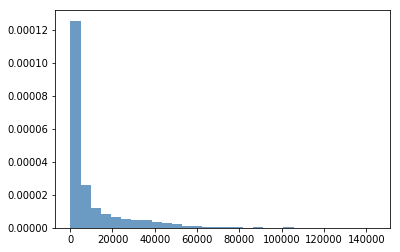

In [9]:
#plt.hist(new_dataset['growth_rate'], bins=30, density=True, alpha=0.8, histtype='stepfilled', color='steelblue')
plt.hist(final_data['gdp'], bins=30, density=True, alpha=0.8, histtype='stepfilled', color='steelblue')

C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\RHedg\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


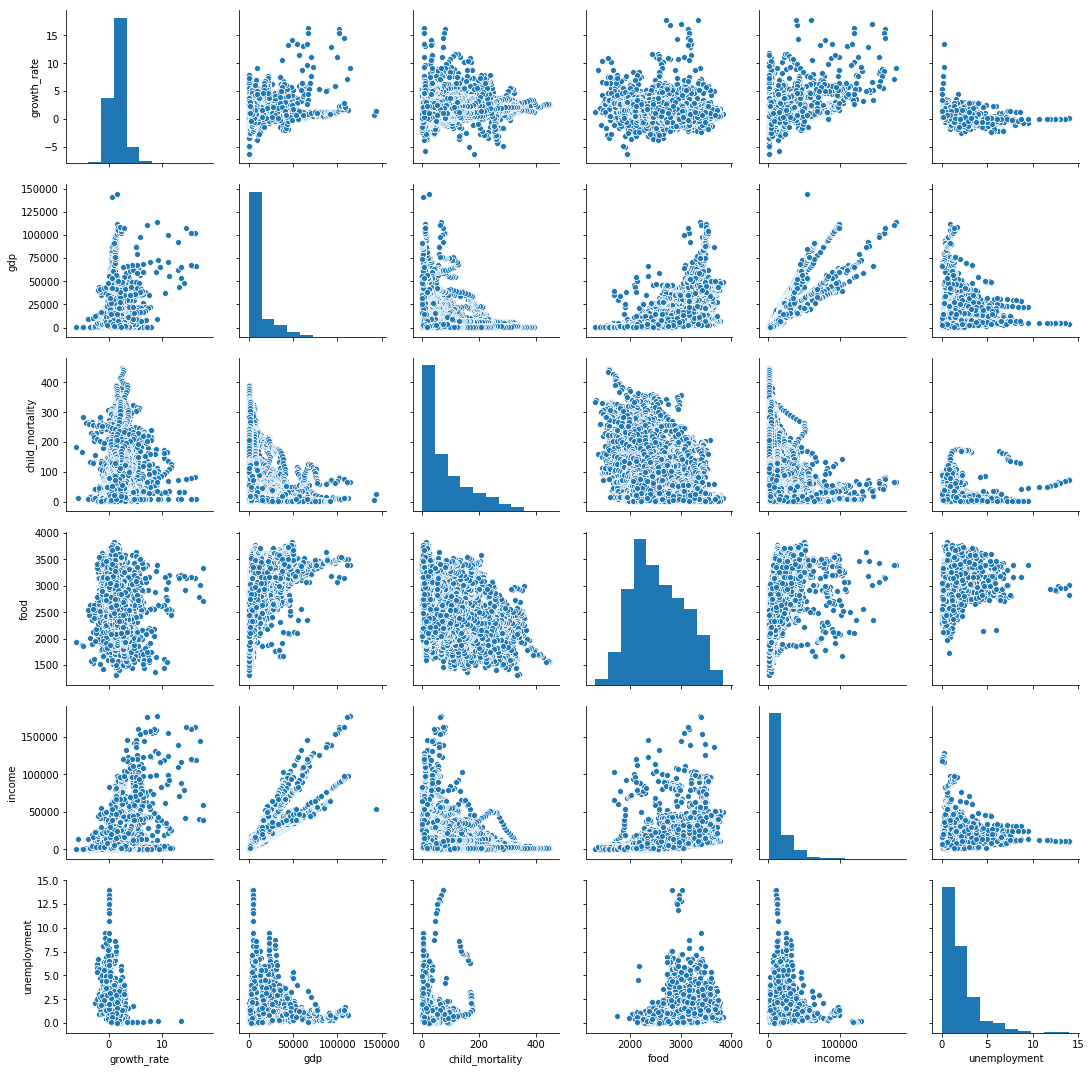

In [8]:
sns.pairplot(final_data[['growth_rate','gdp','child_mortality','food','income','unemployment']])

In [167]:
unemployment
unemployment2 = unemployment.iloc[:,[0,1]]
unemployment2.columns = ['country','unemployment']
year = list(unemployment)[1]
unemployment2.insert(1, 'year', year)
for i in range(1, len(unemployment.columns)-1):
    year = list(unemployment)[1+i]
    new_year = pd.DataFrame(unemployment.iloc[:,0]).join(pd.DataFrame(unemployment.iloc[:,i+1]))
    new_year.columns = ['country','unemployment']
    new_year.insert(1, 'year', year)
    unemployment2 = pd.concat([unemployment2,new_year]).reset_index().drop('index', axis=1)
unemployment2

,country,year,unemployment
0,Albania,1990,NaN
1,Algeria,1990,NaN
2,Angola,1990,NaN
3,Argentina,1990,NaN
4,Armenia,1990,NaN
5,Australia,1990,1.240
6,Austria,1990,NaN
7,Azerbaijan,1990,NaN
8,Bangladesh,1990,NaN
9,Belarus,1990,NaN


In [149]:
# food
# food2 = food.iloc[:,[0,1]]
# food2.columns = ['country','food']
# year = list(food)[1]
# food2.insert(1, 'year', year)
# food2
# len(food.columns)
# year = list(food)[1+1]
# year
new_year = pd.DataFrame(food.iloc[:,0]).join(pd.DataFrame(food.iloc[:,1+1]))
new_year.columns = ['country','food']
new_year.insert(1, 'year', year)
new_year
food2 = pd.concat([food,new_year]).reset_index().drop('index', axis=1)

,country,year,food
0,Afghanistan,1962,2920.0
1,Albania,1962,2240.0
2,Algeria,1962,1570.0
3,Angola,1962,1820.0
4,Antigua and Barbuda,1962,2190.0
5,Argentina,1962,3080.0
6,Armenia,1962,NaN
7,Australia,1962,3110.0
8,Austria,1962,3190.0
9,Azerbaijan,1962,NaN


In [56]:
new_dataset = pd.DataFrame(growth_rate.iloc[:,[0,1]])
new_dataset.columns = ['country','growth_rate']
new_dataset

#df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis='columns')

,country,growth_rate
0,Afghanistan,1.820
1,Albania,3.020
2,Algeria,2.510
3,Andorra,7.050
4,Angola,1.900
5,Antigua and Barbuda,1.120
6,Argentina,1.630
7,Armenia,3.600
8,Australia,2.270
9,Austria,0.511


In [91]:
for i in range(1,5):
    print(i)

1
2
3
4
